# Modeling an autoregressive moving average (ARMA) process
In a moving average (MA) process:

$y_t = μ + ϵ_t + θ_1 ϵ_{t−1} + θ_2 ϵ_{t−2} + ⋅⋅⋅ + θ_q ϵ_{t−q}$

* The present value is linearly dependent on the mean, the current error term, and past error terms. The order q can be inferred using the ACF plot where autocorrelation coefficients will be significant up until lag q only.
* In the case where the ACF plot shows a slowly decaying pattern or a sinusoidal pattern, then it is possible that we are in the presence of an AR process instead of a AR process.

In the autoregressive (AR) process:

$y_t = C + (ϕ_1 y_{t-1} + ϵ_t ) + (ϕ_2 y_{t-2} + ϵ_t ) + ⋅⋅⋅ + (ϕ_p y_{t-p} + ϵ_t )$

* The present value is linearly dependent on its own past value. In other words, it is a regression of the variable against itself. We saw that we can infer the order p using the PACF plot, where the partial  autocorrelation coefficients will be significant up until lag p only.


**How to treat time series where you cannot infer an order from the ACF plot nor from the PACF plot?**

This means that both figures exhibit a slowly `decaying pattern` or a `sinusoidal pattern`. In such case, we are in the presence of an autoregressive moving average process (ARMA). Thus define a general modeling procedure that will allow to model such complex time series. This procedure involves:
* model selection using the **`Akaike’s Information Criterion (AIC)`**, which will determine the `optimal combination of p and q`.
* evaluate the models’ validity using residual analysis, by studying the `correlogram`, `Q-Q plot` and `density plot` of the model’s residuals in order to assess if they closely resemble white noise. 
* then, move on to forecasting our time series using the ARMA(p,q) model.

## STEPS
1. collect the data
2. check for `stationarity` (using ADF test)
    * if not stationary, then apply transformation e.g. first difference
3. check for MA process using ACF plot
    * if there are significant autocorrelation coefficients after lag 0. Therefore, it is not a `random walk`, apply MA(q)
    * if coefficients slowly decay, apply AR(p)
    * Can STOP the process
4. check for AR process using PACF plot
    * if coefficients slowly decay, apply AR(p)
    * if coefficients have sinusoidal pattern as well, apply ARMA (p,q)
    * Can STOP the process
5. fit many ARMA(p,q) models with various combination of p and q.
6. select a model according to the **`Akaike’s Information Criterion (AIC)`** and assess its viability via the analysis of its `residuals`. Ideally, the residuals of a model will have similar characteristics to white noise.
7. use this model to make forecasts.


## Defining an ARMA process
The ARMA(p,q) process is expressed as a linear combination of a constant $C$, the past values of the series $y_{t-p}$, the mean of the series $µ$, past error terms $ε_{t-q}$, and the current error term $ε_t$, as:

$y_t = [C + (ϕ_1 y_{t-1} + ϵ_t ) + (ϕ_2 y_{t-2} + ϵ_t ) + ⋅⋅⋅ + (ϕ_p y_{t-p} + ϵ_t )] + [μ + ϵ_t + θ_1 ϵ_{t−1} + θ_2 ϵ_{t−2} + ⋅⋅⋅ + θ_q ϵ_{t−q}]$



## Identifying a stationary ARMA process
**If your process is stationary and both the ACF and PACF plots show a decaying pattern or sinusoidal pattern, then it is a stationary ARMA(p,q) process.**
### EXAMPLE

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42) 
ar1      = np.array([1, -0.33])
ma1      = np.array([1, 0.9])
ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000) 

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


ADF Statistics: -6.429878682042688
p - value: 1.707846668009726e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


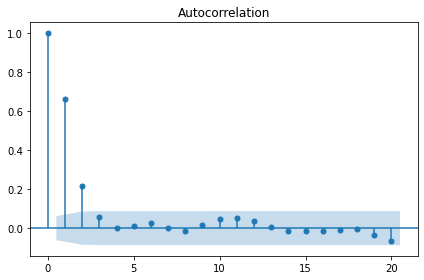

In [2]:
## Test for stationarity
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # Retrieve the ADF statistic
    print('p - value: {}'.format(result[1]))      # Retrieve the p-value
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    return result

DF_result = adf_test(ARMA_1_1) 

plot_acf(ARMA_1_1, lags=20); 
plt.tight_layout() 
plt.show()

**Notice the `sinusoidal` pattern on the plot (which indicates the presence of an autoregressive process), meaning that an `AR(p)` process is in play**. Also, the last significant coefficient is at lag 2, meaning that we cannot infer the order q of an ARMA(p,q) process from the ACF plot. We see that last significant coefficient is at lag 2, which suggests that q = 2. However, we know that we simulated an ARMA(1,1) process, so q must be equal to 1. Thus, the ACF plot cannot be used to infer the order q of an ARMA(p,q) process.

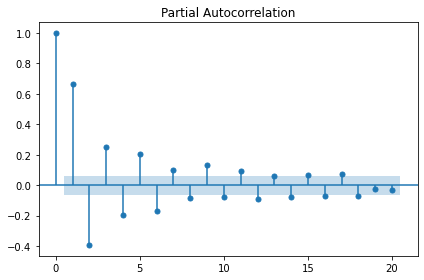

In [3]:
plot_pacf(ARMA_1_1, lags=20); 
plt.tight_layout() 
plt.show()

**Notice the `sinusoidal` pattern on the plot with no clear cutoff b/w significant and non-significant coefficients**. Meaning that we cannot infer the order p of an ARMA(p,q) process from the PACF plot. Since there is not clear cutoff between significant and non-significant coefficients in both the ACF and PACF plots, we can conclude that we have an ARMA(p,q) process.

## General Proecdure to find order of p and q
1. gather data
2. test for stationarity:
    * If non-stationarity - apply transformations
3. define a list of possible values for p and q
4. fit every combination of ARMA(p,q) on data
5. select the model with the lowest `AIC`
6. perform the `residual analysis` by looking at the `Q-Q plot` and the residuals' `correlogram` (**Ljung-Box test**)
7. if residuals look like `white noise`, then the model can be used for forecasts

This procedure has the advantage that it can also be applied in situations where our time series is non-stationary and has seasonal effects.

### Akaike’s Information Criterion (AIC)
The AIC estimates the quality of a model relative to other models. It quantifies the relative amount of information lost by the model i.e. a lower AIC value translates into a better model.The AIC is a function of the number of `estimated parameters k` and the `maximum value of the likelihood function` for the model $\^L$:

$AIC = 2k - 2 ln(\^L)$

The number of estimated parameters 𝑘 is directly related to the order (p,q) of an ARMA(p,q) model. If we fit an ARMA(2,2) model, then we have 2 + 2 = 4 parameters to estimate. If we fit an ARMA(3,4) model, then we have 3 + 4 = 7 parameters to estimate. **Fitting a more complex model can penalize the AIC score: as the order (p,q) increases, the number of parameters 𝑘 increases, and so the AIC increases.**

The likelihood function measures the goodness of fit of a model. Given a set of observed data, it will estimate how likely different model parameters generate the observed data.

For **example**, consider the situation where we roll a 6-sided die. The `distribution function` will tell us that there is a 1/6 probability that we observe either one of these values: [1,2,3,4,5,6]. Now, we flip this logic to explain the likelihood function. Suppose that you roll a die 10 times and you obtain the following values: [1,5,3,4,6,2,4,3,2,1]. Then, the `likelihood function` will determine how likely it is that the die has 6 sides. We can think of the likelihood function as an answer to the question How likely is my observed data coming from an ARMA(1,1) model? If it is very likely, meaning that $\^L$ is large, then the ARMA(1,1) model fits the data well. A large value of $\^L$ will lower the AIC.
* An `overfitting` model would have a very good fit, meaning that $\^L$ is large and AIC decreases. However, the number of parameters $k$ would be large as well, which penalizes the AIC.
* An `underfitting` model would have a small number of parameters, so $k$ would be small. However, the maximum value of the likelihood function would also be small due to the poor fit, meaning again that the AIC is penalized.

Thus, the AIC allows us to find a balance between the number of parameters in a model and a good fit to the training data.


### Selecting a model using AIC
We will allow the values of p and q to vary between 0 and 3. Note that this range is arbitrary, and you may try a larger range of values if you wish. The possible values are then 0, 1, 2 and 3.

In [25]:
import pandas as pd
from itertools import product
from typing import Union
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX ## (p,w,q)

ps         = range(0, 4, 1)
qs         = range(0, 4, 1)
order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [27]:
def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = []

    for order in tqdm(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False) ## simple_differencing=False: to prevent differencing
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [28]:
result_df = optimize_ARMA(ARMA_1_1, order_list) ## ARMA_1_1 = ARMA(1,1) simulated data
result_df


  0%|          | 0/16 [00:00<?, ?it/s]c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

 62%|██████▎   | 10/16 [00:02<00:01,  3.38it/s]c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

 94%|█████████▍| 15/16 [00:05<00:00,  2.27it/s]c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

100%|██████████| 16/16 [00:07<00:00,  2.09it/s]


,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2805.960353
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


### Understading of residual analysis
Residuals analysis answering two questions:
1. does the Q-Q plot show a straight line?
2. are the residuals uncorrelated?

The residuals will be the difference between the values coming from the `model` and the observed values from `simulated process`.

#### QUALITATIVE ANALYSIS: Quantile-Quantile plot or Q-Q plot
* A Q-Q plot is plot of the quantiles of two distributions against each other. In time series forecasting, plot the distribution of our residuals on the y-axis, against the theoretical normal distribution on the x-axis.
* This graphical tool allows to us to assess the goodness of fit of our model. If the distribution of our residuals is similar to a normal distribution, then it will show a straight line lying on y = x. This means that the model is a good fit, because the residuals are similar to white noise.
* On the contrary, if the distribution of our residuals is different from a normal distribution, then it will show a curved line. We then the model is not a good fit, since the residuals’ distribution is not close to a normal
distribution, and therefore the residuals are not similar to white noise.

#### QUANTITATIVE ANALYSIS: Ljung-Box test
* The Ljung-Box test is a statistical test that tests if the autocorrelation of a group of data is significantly different from 0.
    * The null hypothesis states that the data is independently distributed, meaning that there is no autocorrelation.
* Apply the `Ljung-Box test` on the model’s residuals to test if they are similar to `white noise`.
    * If the **p-value is larger than 0.05**, then we `cannot reject the null hypothesis (H0)`, meaning that the residuals are independently distributed. Therefore, there is `no autocorrelation`, the residuals are similar to white noise, and the model can be used for forecasting.
    * if the **p-value if less than 0.05**, then we `reject the null hypothesis (H0)`, meaning that our residuals are not independently distributed and `are correlated`. The model cannot be used for forecasting.


### Perform residual analysis

In [29]:
model     = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid # model's residuals

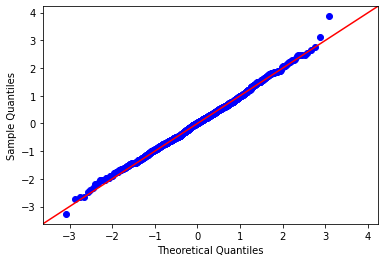

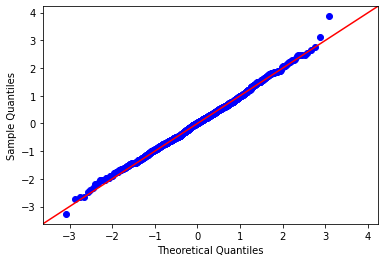

In [32]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='45')

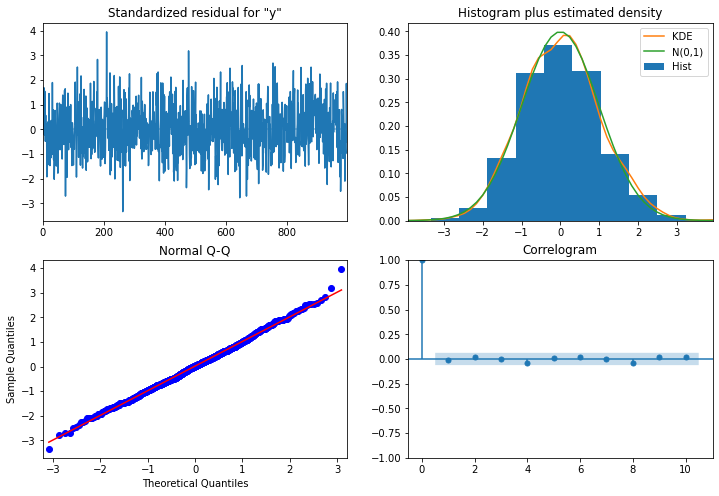

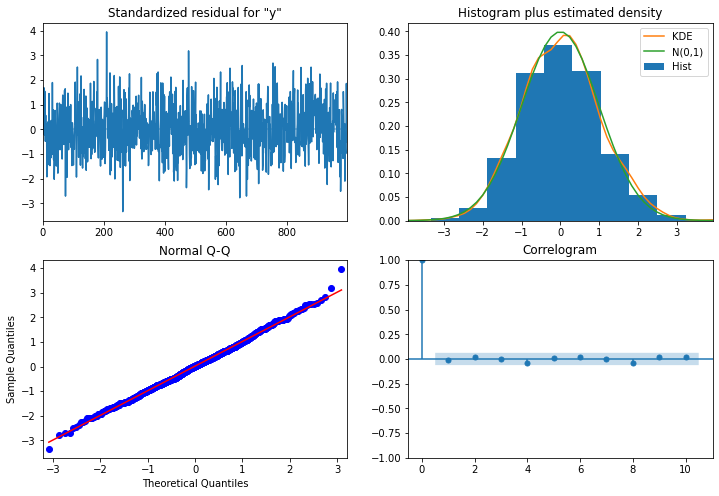

In [35]:
model_fit.plot_diagnostics(figsize=(12, 8))

* The top left plot shows the residuals across the entire dataset. We can see how there is not trend, and the mean seems stable over time, which is indicative of stationarity, just like white noise.
* The top right plot shows a histogram of the residuals. We can see the shape of a normal distribution on this plot, which again indicates that the residuals are close to white noise, as white noise is normally distributed as well.
* The bottom left plot shows the Q-Q plot.
* The bottom right plot shows the autocorrelation function of our residuals. We see how there is only a significant peak at lag 0, and no significant coefficients otherwise. This means that the residuals are not correlated, which further supports the conclusion that they are similar to white noise, that we expect from a good model.

In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1), return_df=False) # Apply the Ljung-Box test on the residuals, on 10 lags
print(pvalue)

## The resulting list of p-values shows that each is above 0.05. Therefore, at each lag, the null hypothesis cannot be rejected, meaning that the residuals are independently distributed and uncorrelated.

[0.86089685 0.76796557 0.90981745 0.72108901 0.81038546 0.82174996
 0.89406254 0.81750093 0.85241945 0.87409314]


### Apply same strategy with `bandwidth` dataset

In [38]:
df = pd.read_csv('bandwidth.csv')
df

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816
...,...
9995,740.546059
9996,738.906228
9997,736.057995
9998,733.559640


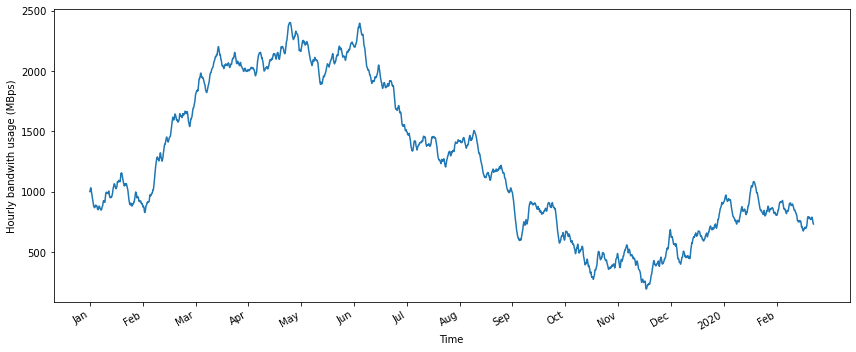

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.hourly_bandwidth)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
plt.xticks(
np.arange(0, 10000, 730), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller

## Test for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # Retrieve the ADF statistic
    print('p - value: {}'.format(result[1]))      # Retrieve the p-value
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    return result

ADF_result = adf_test(df.hourly_bandwidth)

ADF Statistics: -0.8714653199452584
p - value: 0.79722402550146
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
## Apply transformation - First difference ## To remove the effect of the trend and stabilize the mean of the series, we will use differencing.
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)
ADF_result     = adf_test(bandwidth_diff)

ADF Statistics: -20.69485386378893
p - value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [44]:
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})
train   = df_diff[:-168]
test    = df_diff[-168:]
print(len(train))
print(len(test))

9831
168


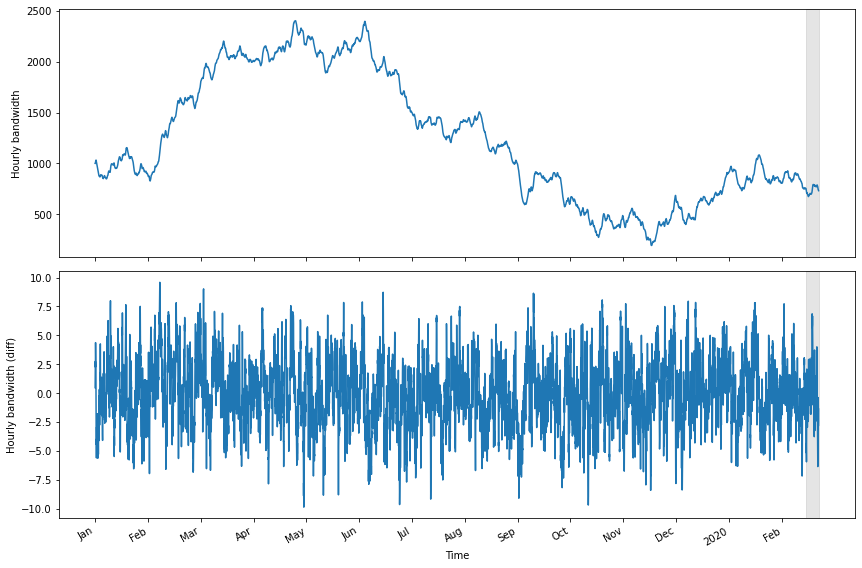

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax2.plot(df_diff.bandwidth_diff)
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth (diff)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 10000, 730), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [46]:
## Obtain the order of p and q for ARMA(p,q)

ps         = range(0, 4, 1)
qs         = range(0, 4, 1)
order_list = list(product(ps, qs))
result_df  = optimize_ARMA(train['bandwidth_diff'], order_list)
result_df

  6%|▋         | 1/16 [00:00<00:04,  3.49it/s]c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
100%|██████████| 16/16 [00:35<00:00,  2.19s/it]


,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


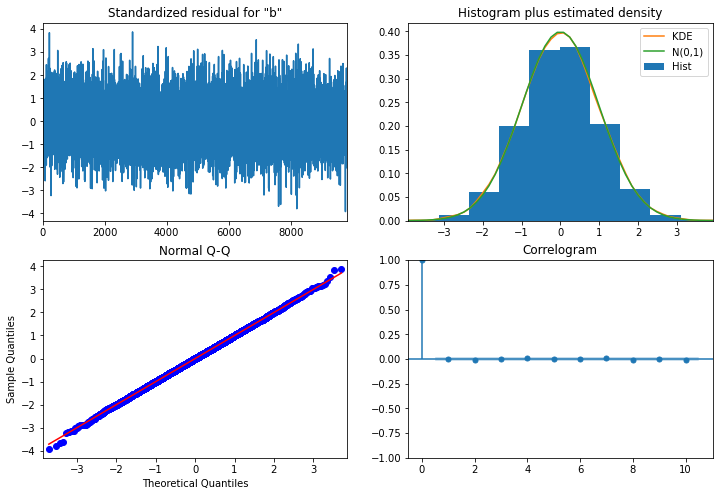

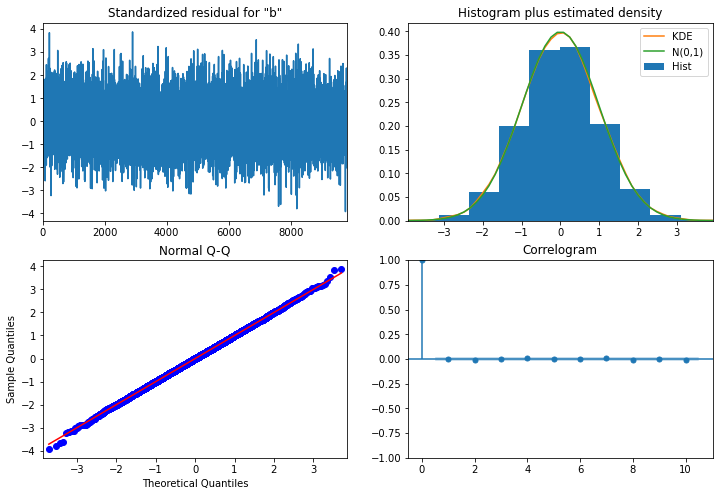

In [47]:
## Choose ARMA(2,2) instead of ARMA(2,3) and ARMA(3,2), since ARMA(2,2) has 4 parameters (less complex).
model = SARIMAX(train['bandwidth_diff'], order=(2, 0, 2), simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(12, 8))

In [49]:
## last step is to run the Ljung-Box test on the residuals for the first 10 lags. If the returned p-values exceed 0.05, then we cannot reject the null hypothesis,
## which means that our residuals are uncorrelated and independently distributed, just like white noise.

residuals       = model_fit.resid
lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1), return_df=False) # Apply the Ljung-Box test on the residuals, on 10 lags
print(pvalue)

## The resulting list of p-values shows that each is above 0.05. Therefore, at each lag, the null hypothesis (H0) cannot be rejected, meaning that the residuals are independently distributed and uncorrelated.

[0.83725732 0.81124742 0.91441596 0.9315449  0.97367787 0.98101905
 0.95260714 0.91906661 0.95361504 0.96401518]


### Forecasting

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    '''
    The function takes in a DataFrame. We also pass in the length of the training set and the horizon of forecast.
    window specifies how many steps at time we wish to forecast. Finally, we specify the method to use to make forecasts. 
    '''
    total_len = train_len + horizon 
 
    if method == 'mean': ## forecasts coming from the historical mean
        pred_mean = [] 
 
        for i in range(train_len, total_len, window): 
            mean = np.mean(df[:i].values) 
            pred_mean.extend(mean for _ in range(window)) 
        return pred_mean 
    
    elif method == 'last': ## forecasts coming from the last observed value
        pred_last_value = [] 
 
        for i in range(train_len, total_len, window): 
            last_value = df[:i].iloc[-1].values[0] 
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value 
 
    elif method == 'ARMA': ## forecasts coming from the ARMA(q,q)
        pred_ARMA = [] 
 
        for i in range(train_len, total_len, window): 
            model       = SARIMAX(df[:i], order=(2,0,2)) ## p, w, q
            res         = model.fit(disp=False) 
            predictions = res.get_prediction(0, i + window - 1) 
            oos_pred    = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred) 
    return pred_ARMA

In [51]:
pred_df                    = test.copy()
TRAIN_LEN                  = len(train)
HORIZON                    = len(test)
WINDOW                     = 2
pred_mean                  = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value            = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA                  = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')
pred_df['pred_mean']       = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_ARMA']       = pred_ARMA
pred_df.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


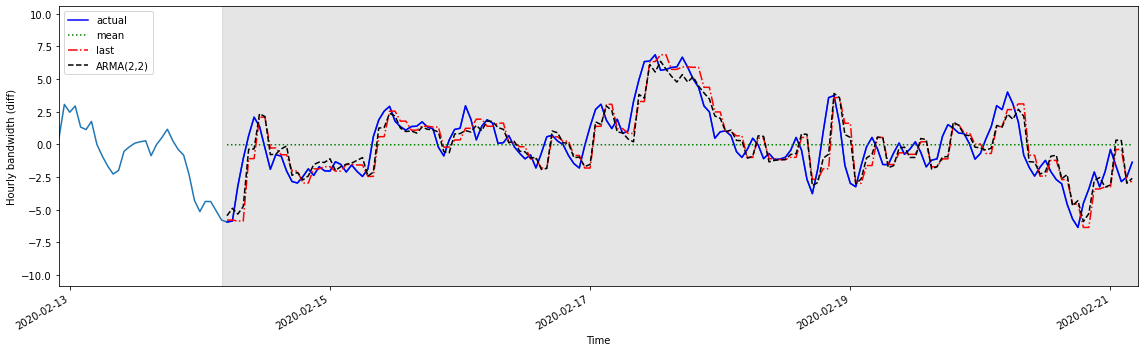

In [52]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df_diff.bandwidth_diff)
ax.plot(pred_df.bandwidth_diff, 'b-', label='actual')
ax.plot(pred_df.pred_mean, 'g:', label='mean')
ax.plot(pred_df.pred_last_value, 'r-.', label='last')
ax.plot(pred_df.pred_ARMA, 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth (diff)')
ax.axvspan(9830, 9999, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks([9802, 9850, 9898, 9946, 9994],['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### Performance

In [53]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df.bandwidth_diff, pred_df.pred_mean)
mse_last = mean_squared_error(pred_df.bandwidth_diff, pred_df.pred_last_value)
mse_ARMA = mean_squared_error(pred_df.bandwidth_diff, pred_df.pred_ARMA)
print(mse_mean, mse_last, mse_ARMA)

6.3065269579893455 2.229758294773407 1.7690462113994323


### Undifferencing

c:\Users\JK\anaconda3\envs\cuda90\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


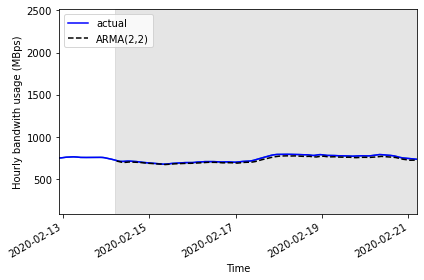

In [54]:
df['pred_bandwidth']        = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + pred_df['pred_ARMA'].cumsum()

fig, ax = plt.subplots()
ax.plot(df.hourly_bandwidth)
ax.plot(df.hourly_bandwidth, 'b-',  label='actual')
ax.plot(df.pred_bandwidth,   'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
ax.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks([9802, 9850, 9898, 9946, 9994],['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error

mae_ARMA_undiff = mean_absolute_error(df.hourly_bandwidth[9832:], df.pred_bandwidth[9832:])
print(mae_ARMA_undiff)

14.000362773966964
